# Dealing with Missing Data

In [42]:
import numpy as np
import pandas as pd
import missingno as msno
from numpy.random import rand
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,5)
import seaborn as sns
sns.set_style('darkgrid')

In [4]:
data = '/Users/rohit/Github/machine_learning_notes/Datacamp/Data/'

In [13]:
pima = pd.read_csv(data + 'pima-indians-diabetes data.csv')

In [14]:
pima.head()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1.0
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0.0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1.0


In [15]:
pima.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnant,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,763.0,121.686763,30.535641,44.000,99.00000,117.0000,141.00000,199.00
Diastolic_BP,733.0,72.405184,12.382158,24.000,64.00000,72.0000,80.00000,122.00
Skin_Fold,541.0,29.153420,10.476982,7.000,22.00000,29.0000,36.00000,99.00
Serum_Insulin,394.0,155.548223,118.775855,14.000,76.25000,125.0000,190.00000,846.00
BMI,757.0,32.457464,6.924988,18.200,27.50000,32.3000,36.60000,67.10
Diabetes_Pedigree,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [16]:
pima.loc[:, 'BMI'] = pima.loc[:, 'BMI'].replace(np.nan, 0)

## Air Quality

In [18]:
df_air = pd.read_csv(data + 'air-quality.csv',
                                    parse_dates=['Date'],
                                    index_col='Date')
df_air.head()

,Ozone,Solar,Wind,Temp
Date,,,,
1976-05-01,41.0,190.0,7.4,67
1976-05-02,36.0,118.0,8.0,72
1976-05-03,12.0,149.0,12.6,74
1976-05-04,18.0,313.0,11.5,62
1976-05-05,NaN,NaN,14.3,56


In [19]:
air_null = df_air.isna()

In [20]:
air_null.head()

,Ozone,Solar,Wind,Temp
Date,,,,
1976-05-01,False,False,False,False
1976-05-02,False,False,False,False
1976-05-03,False,False,False,False
1976-05-04,False,False,False,False
1976-05-05,True,True,False,False


In [21]:
air_null.sum()

Ozone    37
Solar     7
Wind      0
Temp      0
dtype: int64

In [22]:
air_null.mean() * 100

Ozone    24.183007
Solar     4.575163
Wind      0.000000
Temp      0.000000
dtype: float64

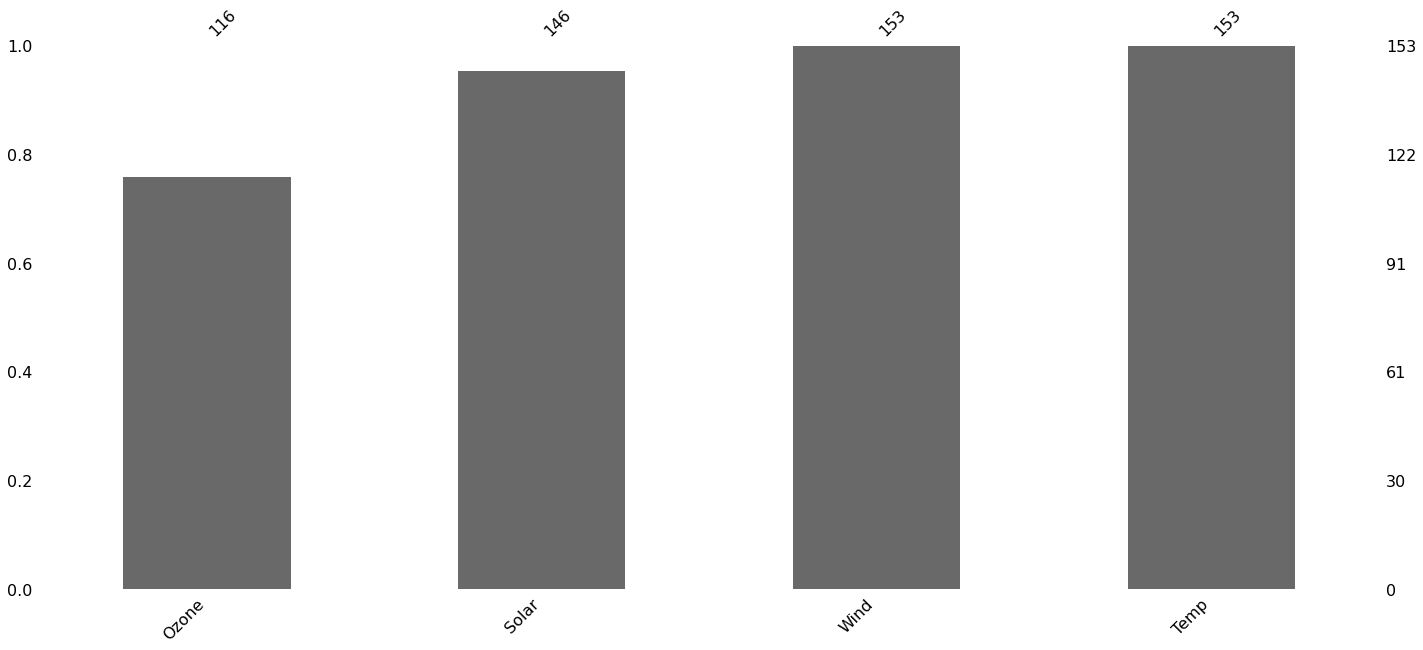

In [25]:
msno.bar(df_air)

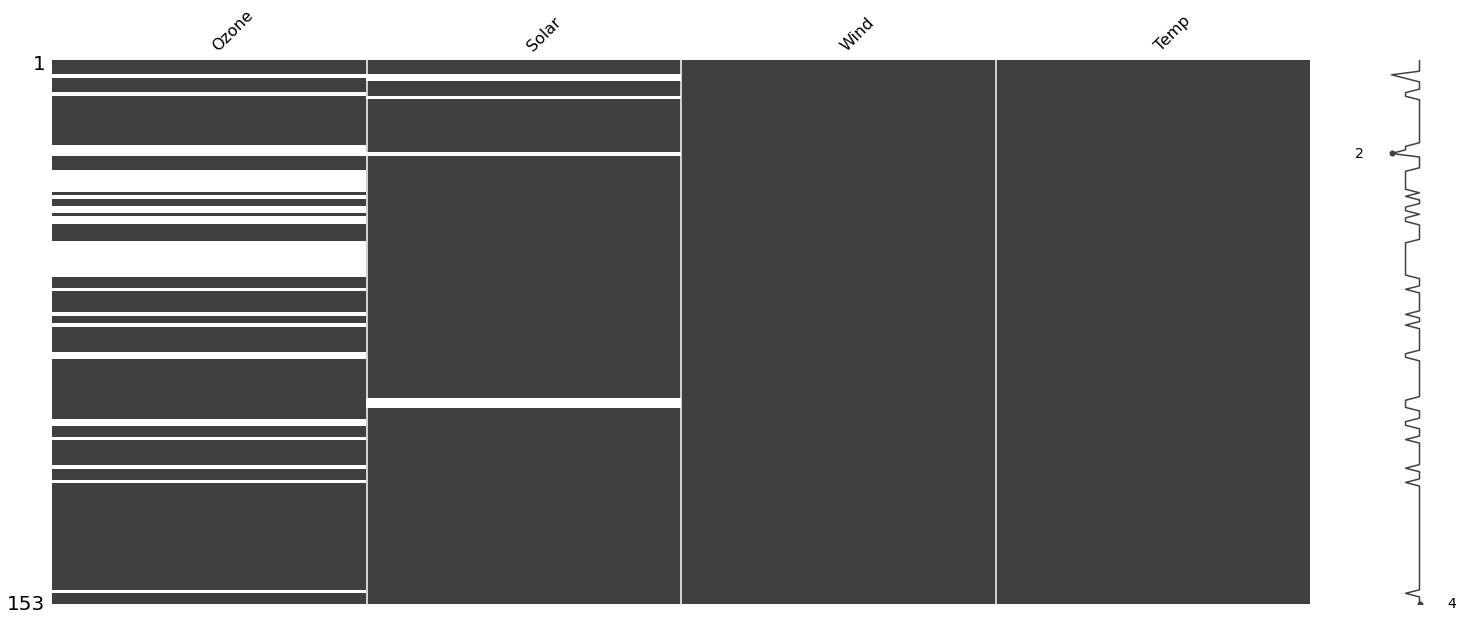

In [26]:
msno.matrix(df_air)

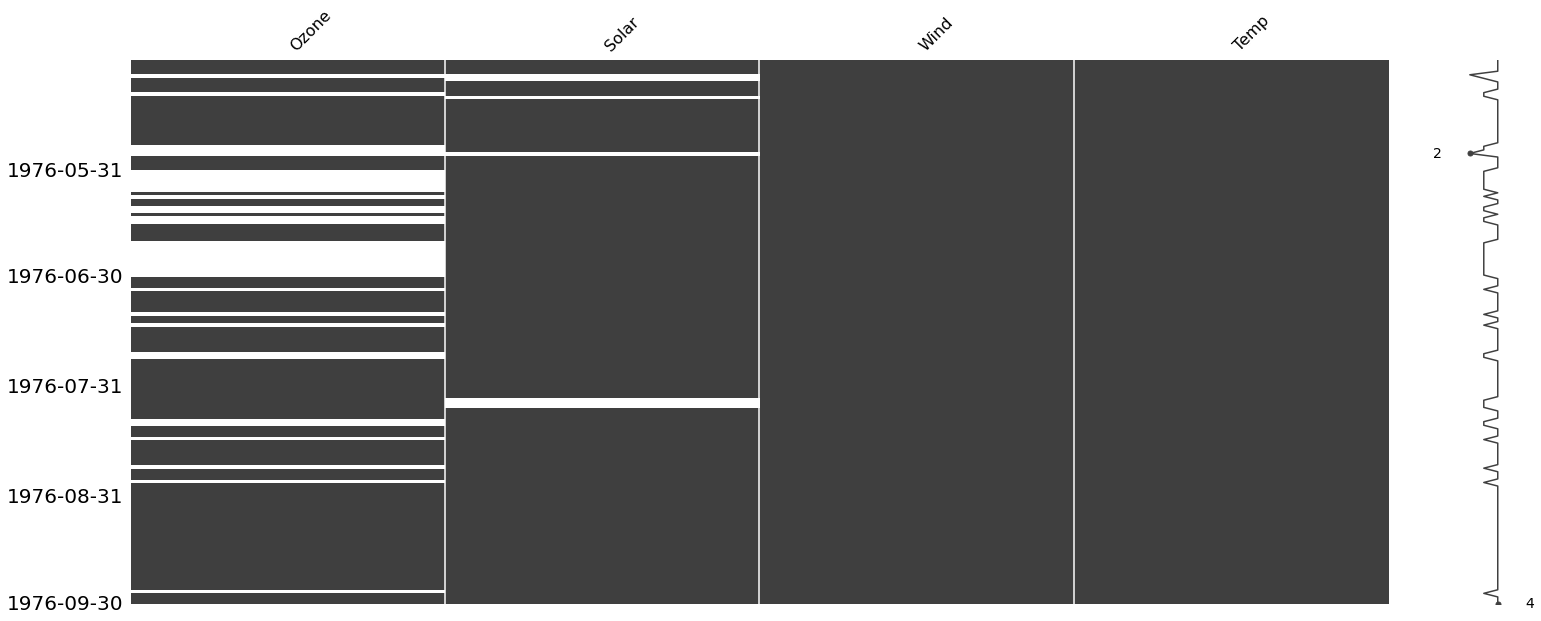

In [27]:
# Look at the dataset at the monthly frequency
msno.matrix(df_air, freq='M')

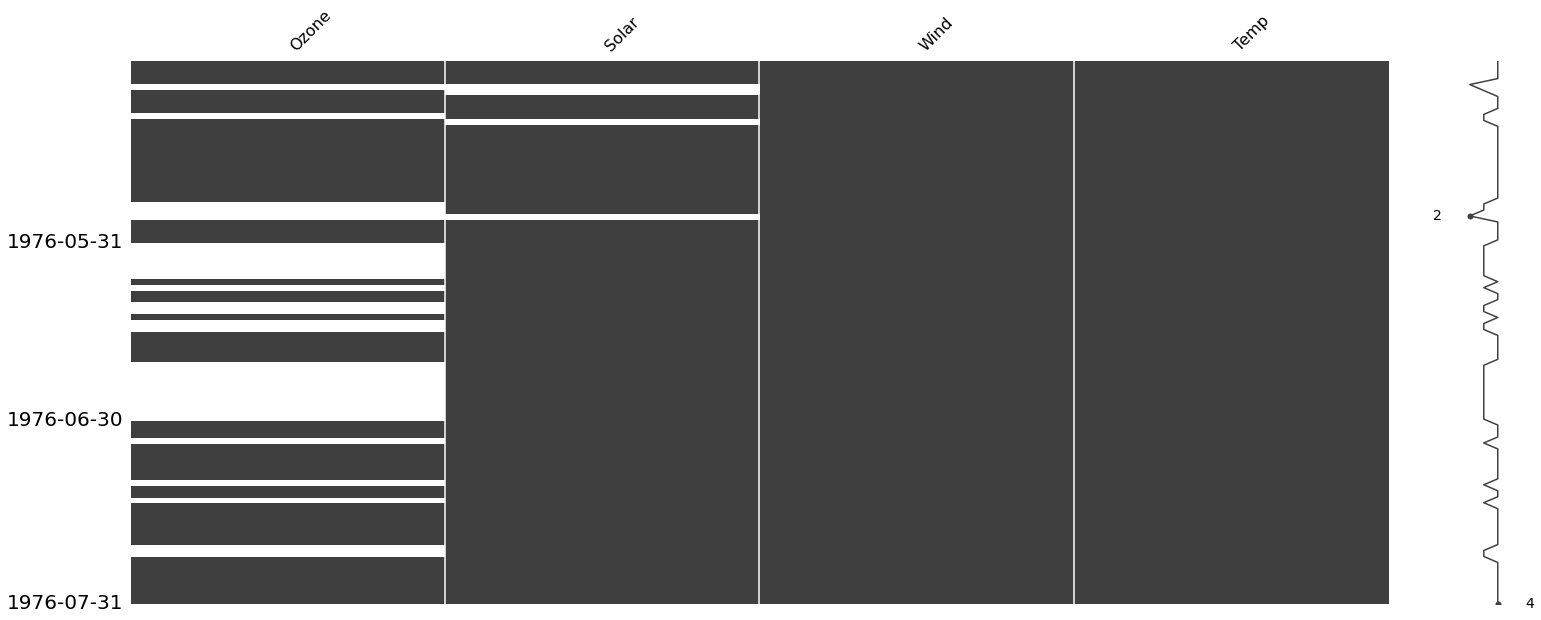

In [28]:
msno.matrix(df_air.loc['May-1976': 'Jul-1976'], freq='M')

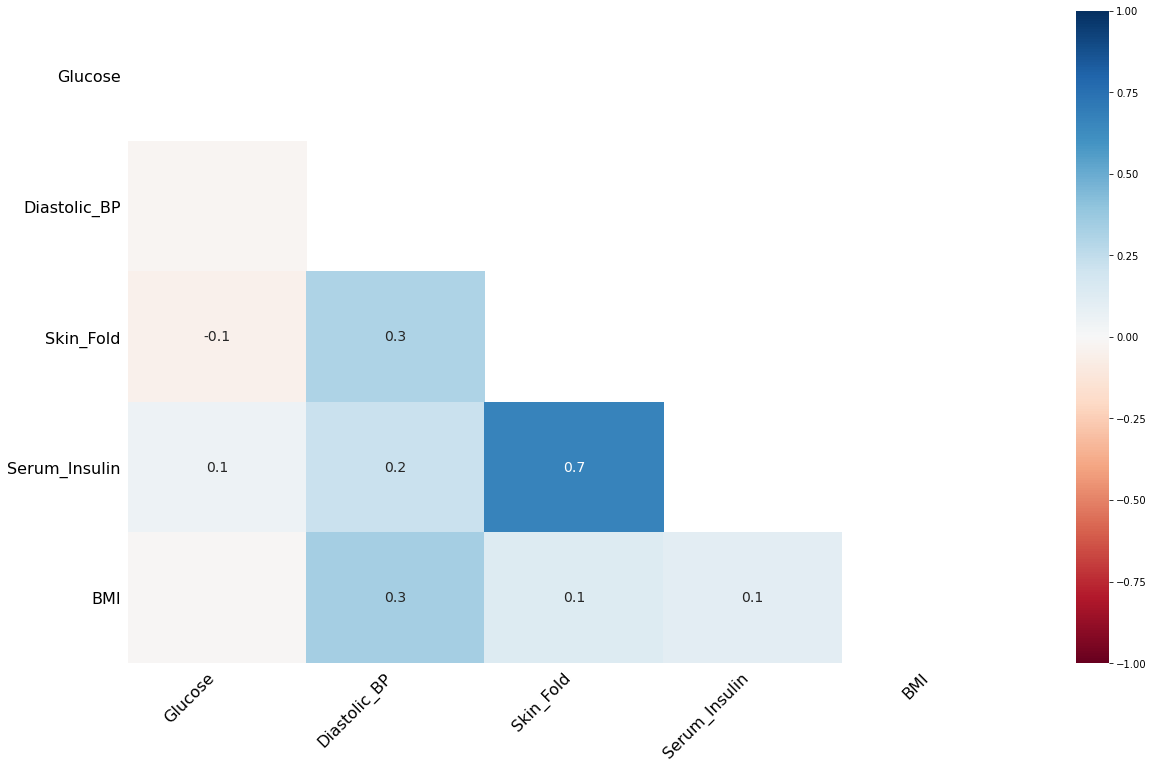

In [30]:
diabetes = pd.read_csv(data + 'pima-indians-diabetes data.csv')
msno.heatmap(diabetes)

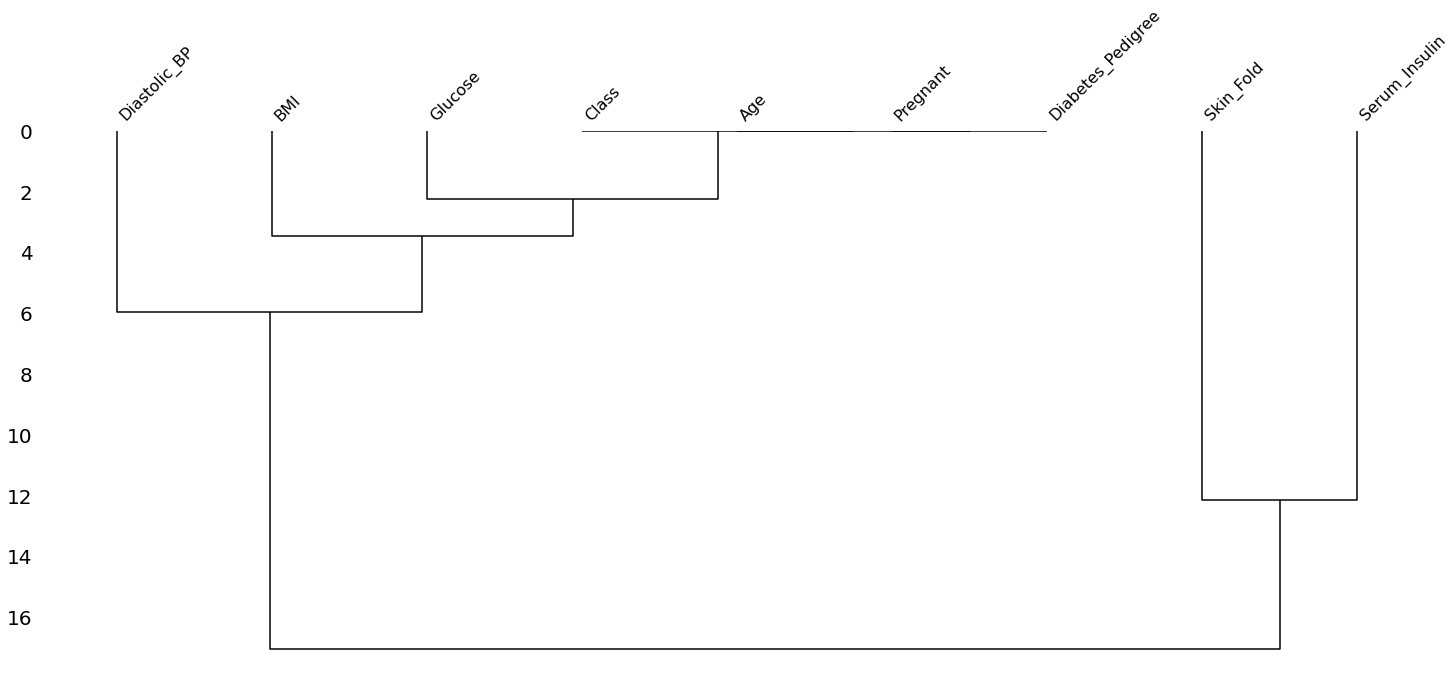

In [32]:
msno.dendrogram(diabetes)

# Creating a plot based to showcase null values

In [33]:
def fill_dummy_values(df, scaling_factor=0.075):
  df_dummy = df.copy(deep=True)
  for col_name in df_dummy:
    col = df_dummy[col_name]
    col_null = col.isnull()    
    # Calculate number of missing values in column 
    num_nulls = col_null.sum()
    # Calculate column range
    col_range = col.max() - col.min()
    # Scale the random values to scaling_factor times col_range
    dummy_values = (rand(num_nulls) - 2) * scaling_factor * col_range + col.min()
    col[col_null] = dummy_values
  return df_dummy

<ipython-input-33-670de794a260>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col[col_null] = dummy_values


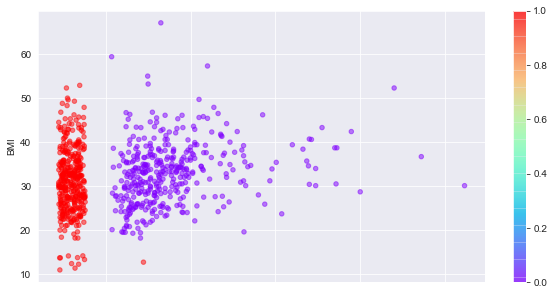

In [43]:
# Fill dummy values in diabetes_dummy
diabetes_dummy = fill_dummy_values(diabetes)

# Sum the nullity of Skin_Fold and BMI
nullity = diabetes.Serum_Insulin.isnull() + diabetes.BMI.isnull()

# Create a scatter plot of Skin Fold and BMI 
diabetes_dummy.plot(x='Serum_Insulin', y='BMI', kind='scatter', alpha=0.5, 
                    
                    # Set color to nullity of BMI and Skin_Fold
                    c=nullity, 
                    cmap='rainbow')

plt.show();